<a href="https://colab.research.google.com/github/KimJisanER/Dacon/blob/main/metabolism_dacon_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

import sys
sys.path

import condacolab
condacolab.check()

!mamba install -c conda-forge rdkit

✨🍰✨ Everything looks OK!
✨🍰✨ Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.1) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['rdkit']

[+] 0.0s
conda-forge/linux-64  ⣾  
cond

In [2]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/metabolism_dacon/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/metabolism_dacon/test.csv')

In [4]:
train_data

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43
...,...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,1.556,3.079,3.409,396.195,3,1,5,3.409,64.74
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,35.560,47.630,1.912,359.381,4,1,3,1.844,77.37
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,56.150,1.790,1.941,261.320,3,1,6,2.124,70.14
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.030,2.770,0.989,284.696,5,1,5,0.989,91.51


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

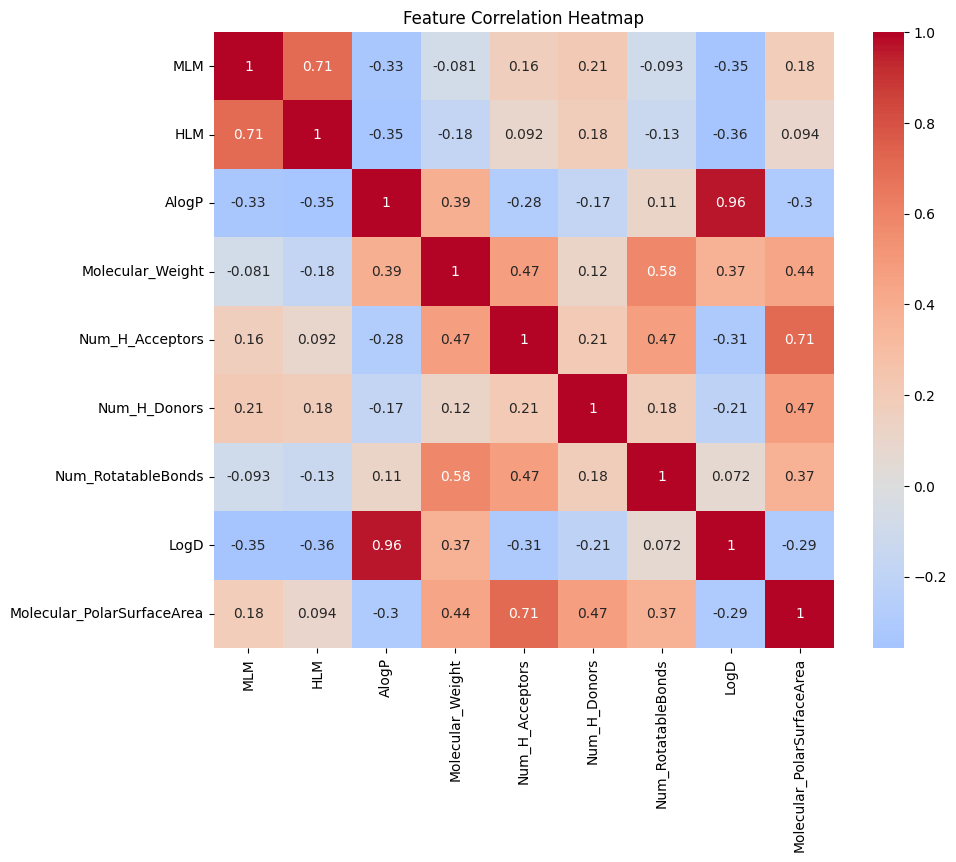

In [6]:
# 상관관계 행렬 계산
correlation_matrix = train_data.iloc[:,2:].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          3498 non-null   object 
 1   SMILES                      3498 non-null   object 
 2   MLM                         3498 non-null   float64
 3   HLM                         3498 non-null   float64
 4   AlogP                       3496 non-null   float64
 5   Molecular_Weight            3498 non-null   float64
 6   Num_H_Acceptors             3498 non-null   int64  
 7   Num_H_Donors                3498 non-null   int64  
 8   Num_RotatableBonds          3498 non-null   int64  
 9   LogD                        3498 non-null   float64
 10  Molecular_PolarSurfaceArea  3498 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 300.7+ KB


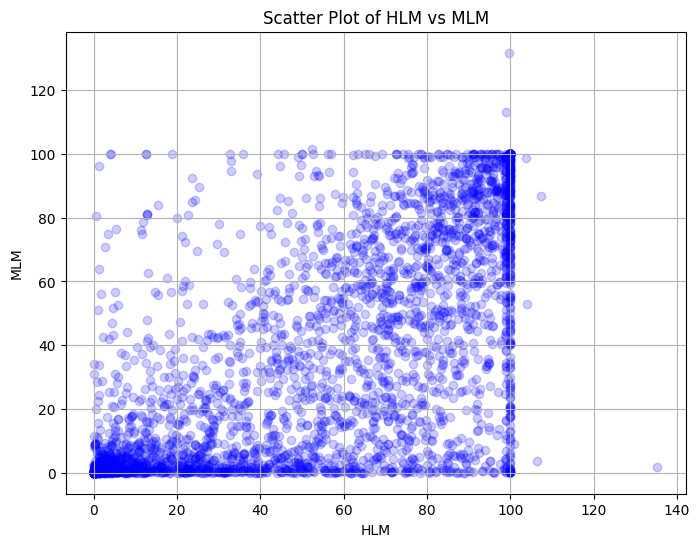

In [ ]:
# 산점도 플롯 그리기
plt.figure(figsize=(8, 6))
plt.scatter(train_data['HLM'], train_data['MLM'], c='blue', marker='o', alpha=0.2)
plt.title('Scatter Plot of HLM vs MLM')
plt.xlabel('HLM')
plt.ylabel('MLM')
plt.grid(True)
plt.show()

회귀선의 공식: LogD = -0.02*HLM + 3.56
역함수의 공식: HLM = -60.55*LogD + 215.49


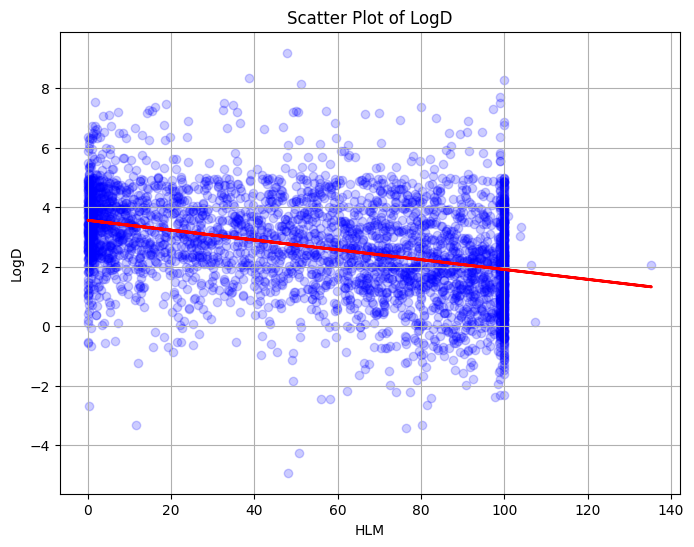

In [ ]:
# 산점도 플롯 그리기
plt.figure(figsize=(8, 6))
plt.scatter(train_data['HLM'], train_data['LogD'], c='blue', marker='o', alpha=0.2)
plt.title('Scatter Plot of LogD')
plt.xlabel('HLM')
plt.ylabel('LogD')

# 선형 회귀 모델 학습
X = np.array(train_data['HLM']).reshape(-1, 1)
y = train_data['LogD']
reg = LinearRegression()
reg.fit(X, y)

slope = reg.coef_[0]
intercept = reg.intercept_
regression_equation = f'LogD = {slope:.2f}*HLM + {intercept:.2f}'
print("회귀선의 공식:", regression_equation)

inverse_slope = 1 / slope
inverse_intercept = -intercept / slope
inverse_regression_equation = f'HLM = {inverse_slope:.2f}*LogD + {inverse_intercept:.2f}'
print("역함수의 공식:", inverse_regression_equation)

# 회귀선 그리기
plt.plot(X, reg.predict(X), color='red', linewidth=2)

plt.grid(True)
plt.show()

회귀선의 공식: HLM = -14.77*LogD + 100.00
역함수의 공식: LogD = -0.07*HLM + 6.77


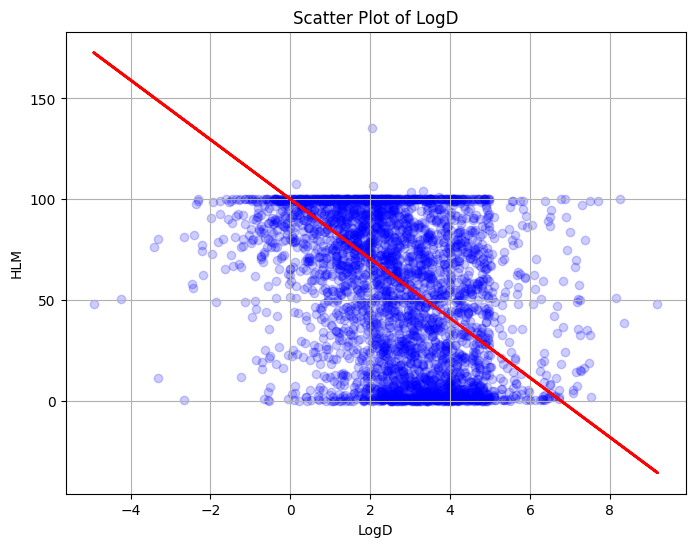

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(train_data['LogD'], train_data['HLM'], c='blue', marker='o', alpha=0.2)
plt.title('Scatter Plot of LogD')
plt.xlabel('LogD')
plt.ylabel('HLM')

# 선형 회귀 모델 학습
X = np.array(train_data['LogD']).reshape(-1, 1)
y = train_data['HLM']

# 절편을 100으로 고정한 선형 회귀 모델 생성
fixed_intercept = 100
reg = LinearRegression(fit_intercept=False)
reg.fit(X, y - fixed_intercept)  # Adjusting the target variable

slope = reg.coef_[0]
regression_equation = f'HLM = {slope:.2f}*LogD + {fixed_intercept:.2f}'
print("회귀선의 공식:", regression_equation)

inverse_slope = 1 / slope
inverse_intercept = -fixed_intercept / slope
inverse_regression_equation = f'LogD = {inverse_slope:.2f}*HLM + {inverse_intercept:.2f}'
print("역함수의 공식:", inverse_regression_equation)

# 회귀선 그리기 (절편을 고정했으므로 y절편은 고정된 값)
plt.plot(X, reg.predict(X) + fixed_intercept, color='red', linewidth=2)

plt.grid(True)
plt.show()


In [ ]:
# 연산 및 cal_HLM 컬럼 추가
train_data['cal_MLM'] = -61.16 * train_data['LogD'] + 201.41

# 0 미만 값은 0으로, 100 초과 값은 100으로 설정
train_data['cal_MLM'] = train_data['cal_MLM'].apply(lambda x: 0 if x < 0 else (100 if x > 100 else x))

# 연산 및 cal_HLM 컬럼 추가
train_data['cal_HLM'] = -60.55 * train_data['LogD'] + 215.49

# 0 미만 값은 0으로, 100 초과 값은 100으로 설정
train_data['cal_HLM'] = train_data['cal_HLM'].apply(lambda x: 0 if x < 0 else (100 if x > 100 else x))


In [ ]:
# 연산 및 cal_HLM 컬럼 추가
test_data['cal_MLM'] = -61.16 * test_data['LogD'] + 201.41

# 0 미만 값은 0으로, 100 초과 값은 100으로 설정
test_data['cal_MLM'] = test_data['cal_MLM'].apply(lambda x: 0 if x < 0 else (100 if x > 100 else x))

# 연산 및 cal_HLM 컬럼 추가
test_data['cal_HLM'] = -60.55 * test_data['LogD'] + 215.49

# 0 미만 값은 0으로, 100 초과 값은 100으로 설정
test_data['cal_HLM'] = test_data['cal_HLM'].apply(lambda x: 0 if x < 0 else (100 if x > 100 else x))

In [ ]:
train_data[train_data['HLM']>100]

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,cal_MLM,cal_HLM
1092,TRAIN_1092,COc1c(NC(=O)c2ccc[nH]2)cc(Cl)cc1C(=O)N(C)C,3.820,106.510,2.061,321.759,3,2,4,2.061,74.43,75.35924,90.69645
1584,TRAIN_1584,CN(C)S(=O)(=O)CCNCc1ccc(-c2ccccc2)cc1,1.745,135.336,2.075,318.434,3,1,7,2.052,57.79,75.90968,91.24140
2410,TRAIN_2410,CC(C)CCC1CCN(C(=O)C2CC(O)CN2)CC1,86.878,107.323,1.345,268.395,3,2,4,0.139,52.57,100.00000,100.00000
2586,TRAIN_2586,Cc1nc(-c2c[nH]c(C(=O)N3CCOc4cc(F)ccc43)c2)cs1,98.550,103.720,2.876,343.375,3,1,2,3.032,86.46,15.97288,31.90240
3157,TRAIN_3157,CN1C(=O)c2cccc3c2C1=Cc1ccc2ccccc2c1O3,52.847,103.907,3.319,299.323,2,0,0,3.319,29.54,0.00000,14.52455
3403,TRAIN_3403,c1cnc2c(C3NCCc4c3[nH]c3ccccc43)cccc2c1,8.890,100.830,3.719,299.369,2,2,1,3.719,40.71,0.00000,0.00000


In [ ]:
train_data

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,cal_MLM,cal_HLM
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37,2.08956,18.15755
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47,68.57048,83.97540
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45,100.00000,100.00000
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60,0.00000,5.07875
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43,58.47908,73.98465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,1.556,3.079,3.409,396.195,3,1,5,3.409,64.74,0.00000,9.07505
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,35.560,47.630,1.912,359.381,4,1,3,1.844,77.37,88.63096,100.00000
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,56.150,1.790,1.941,261.320,3,1,6,2.124,70.14,71.50616,86.88180
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.030,2.770,0.989,284.696,5,1,5,0.989,91.51,100.00000,100.00000


In [ ]:
train_data['MLM_diff'] = train_data['MLM'] - train_data['cal_MLM']
train_data['HLM_diff'] = train_data['HLM'] - train_data['cal_HLM']

In [ ]:
train_data

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,cal_MLM,cal_HLM,MLM_diff,HLM_diff
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37,2.08956,18.15755,23.92044,32.52245
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47,68.57048,83.97540,-39.30048,-33.38540
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45,100.00000,100.00000,-94.41400,-19.10800
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60,0.00000,5.07875,5.71000,-3.07875
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43,58.47908,73.98465,34.79092,26.00535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,1.556,3.079,3.409,396.195,3,1,5,3.409,64.74,0.00000,9.07505,1.55600,-5.99605
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,35.560,47.630,1.912,359.381,4,1,3,1.844,77.37,88.63096,100.00000,-53.07096,-52.37000
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,56.150,1.790,1.941,261.320,3,1,6,2.124,70.14,71.50616,86.88180,-15.35616,-85.09180
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.030,2.770,0.989,284.696,5,1,5,0.989,91.51,100.00000,100.00000,-99.97000,-97.23000


In [ ]:
def preprocess_data(df):
    # Molecular fingerprint 계산
    fp_list = []
    for smiles in df['SMILES']:
        mol = Chem.MolFromSmiles(smiles)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048, useChirality=True)
        fp_list.append(keras.utils.to_categorical(fp, num_classes=2))
    df['Fingerprint'] = fp_list

    # Fingerprint를 numpy 배열로 변환
    X = np.array(list(df['Fingerprint']))
    X = np.reshape(X, (X.shape[0], -1))

    return X

학습이 잘 안된 이유 : train과 test 핑거프린트를 같이 만들어야함

In [ ]:
preprocess_data(train_data)

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
preprocess_data(test_data)

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
train_data

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,cal_MLM,cal_HLM,MLM_diff,HLM_diff,Fingerprint
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37,2.08956,18.15755,23.92044,32.52245,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0..."
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47,68.57048,83.97540,-39.30048,-33.38540,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0..."
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45,100.00000,100.00000,-94.41400,-19.10800,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0..."
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60,0.00000,5.07875,5.71000,-3.07875,"[[1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0..."
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43,58.47908,73.98465,34.79092,26.00535,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,1.556,3.079,3.409,396.195,3,1,5,3.409,64.74,0.00000,9.07505,1.55600,-5.99605,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0..."
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,35.560,47.630,1.912,359.381,4,1,3,1.844,77.37,88.63096,100.00000,-53.07096,-52.37000,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0..."
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,56.150,1.790,1.941,261.320,3,1,6,2.124,70.14,71.50616,86.88180,-15.35616,-85.09180,"[[0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0..."
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.030,2.770,0.989,284.696,5,1,5,0.989,91.51,100.00000,100.00000,-99.97000,-97.23000,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0..."


In [ ]:
X = train_data.drop(columns=['MLM_diff','HLM_diff'])
y = train_data[['MLM_diff', 'HLM_diff']]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_test = test_data

In [ ]:
X_train

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,cal_MLM,cal_HLM,Fingerprint
1963,TRAIN_1963,Cc1cnn(C2CCN(C(=O)c3ccc(-c4cc[nH]n4)s3)C2)c1,55.400,64.390,2.574,327.404,3,1,3,2.574,95.04,43.98416,59.63430,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0..."
3136,TRAIN_3136,O=c1ccc2cnc(Nc3cnn(C4CCNCC4)c3)nc2n1C1CCCCCC1,21.620,74.740,2.829,407.512,5,2,4,1.649,87.97,100.00000,100.00000,"[[1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0..."
178,TRAIN_0178,c1ccc2c(c1)CCN(c1nc(N3CCOCC3)c3nn[nH]c3n1)C2,74.931,81.019,2.585,337.379,5,1,2,2.585,83.06,43.31140,58.96825,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0..."
1850,TRAIN_1850,CCn1c(C(=O)N(C)c2cc(C)ccc2OC)cc2c(=O)oc3ccccc3c21,1.530,0.880,4.641,390.432,4,0,4,4.641,60.77,0.00000,0.00000,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0..."
3391,TRAIN_3391,Cc1nc(NCC(C(C)C)N(C)C)c2nc(C)oc2n1,71.083,95.983,1.699,277.365,4,1,5,0.967,67.08,100.00000,100.00000,"[[1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,TRAIN_1095,Cc1nc(C)c2c(C)c(CNCC(C)(C)N3CCOCC3)sc2n1,0.390,40.710,1.861,348.506,5,1,5,0.764,78.52,100.00000,100.00000,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0..."
1130,TRAIN_1130,CCCNS(=O)(=O)c1ccc(OCC(=O)N2CCN(Cc3ccc4c(c3)OC...,38.386,15.982,2.658,489.584,7,1,9,2.603,105.79,42.21052,57.87835,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0..."
1294,TRAIN_1294,COc1cc(=O)[nH]cc1C(=O)N1CCCCC1c1ccccc1,84.010,89.530,1.267,312.363,3,1,3,1.279,58.64,100.00000,100.00000,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0..."
860,TRAIN_0860,COc1cc(C(=O)Nc2ncc3c(n2)CC(c2ccc(C)cc2)CC3=O)c...,12.860,8.370,3.606,447.483,7,1,6,3.540,99.64,0.00000,1.14300,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0..."


In [ ]:
X_test

,id,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,Fingerprint,cal_MLM,cal_HLM
0,TEST_000,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,2.641,361.505,4,2,7,2.635,92.76,"[[1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0...",40.25340,55.94075
1,TEST_001,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,0.585,370.399,5,0,3,0.585,68.31,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0...",100.00000,100.00000
2,TEST_002,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,4.276,347.414,4,4,5,4.290,92.86,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0...",0.00000,0.00000
3,TEST_003,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,1.795,345.358,5,0,2,1.795,81.21,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0...",91.62780,100.00000
4,TEST_004,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,1.219,353.418,4,0,2,0.169,61.15,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0...",100.00000,100.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
478,TEST_478,CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1,4.207,306.443,2,1,7,4.207,55.13,"[[1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0...",0.00000,0.00000
479,TEST_479,CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1,-0.608,335.398,5,0,1,-1.736,70.16,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0...",100.00000,100.00000
480,TEST_480,CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12,1.792,349.383,3,1,3,1.792,69.72,"[[1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0...",91.81128,100.00000
481,TEST_481,Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1,0.790,341.132,3,2,2,0.423,69.64,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0...",100.00000,100.00000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성 및 훈련 데이터로 학습
scaler = MinMaxScaler()
numeric_columns = X_train.select_dtypes(include=['number']).drop(['HLM', 'MLM', 'cal_MLM', 'cal_HLM'], axis=1)
scaler.fit(numeric_columns)

# 스케일링된 데이터로 데이터프레임 업데이트 함수 정의
def scale_dataframe(df, scaler, columns_to_scale):
    scaled_data = scaler.transform(df[columns_to_scale])
    scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale, index=df.index)
    return pd.concat([df.drop(columns_to_scale, axis=1), scaled_df], axis=1)

# 훈련 데이터 스케일링
X_train_scaled = scale_dataframe(X_train, scaler, numeric_columns.columns)

# 검증 데이터 스케일링 (훈련 데이터 기준으로 변환)
X_val_scaled = scale_dataframe(X_val, scaler, numeric_columns.columns)

# 테스트 데이터 스케일링 (훈련 데이터 기준으로 변환)
X_test_scaled = scale_dataframe(X_test, scaler, numeric_columns.columns)


In [ ]:
def convert_data(data):
  data_array = np.array([dt for dt in data])
  return data_array

In [ ]:
train_inputs = [np.array(convert_data(X_train_scaled['Fingerprint'])), X_train_scaled[['Molecular_Weight', 'Num_H_Acceptors', 'Num_H_Donors', 'Num_RotatableBonds', 'LogD', 'Molecular_PolarSurfaceArea']] ]
val_inputs = [np.array(convert_data(X_val_scaled['Fingerprint'])) , X_val_scaled[['Molecular_Weight', 'Num_H_Acceptors', 'Num_H_Donors', 'Num_RotatableBonds', 'LogD', 'Molecular_PolarSurfaceArea']] ]
test_inputs = [np.array(convert_data(X_test_scaled['Fingerprint'])) , X_test_scaled[['Molecular_Weight', 'Num_H_Acceptors', 'Num_H_Donors', 'Num_RotatableBonds', 'LogD', 'Molecular_PolarSurfaceArea']] ]

In [ ]:
from keras.optimizers import Adam

bit_input_shape = (2048,2)  # 비트 입력 크기
x2_input_shape = (6,1)

# 새로운 학습률 설정
new_learning_rate = 0.0001

# Adam 옵티마이저 생성 및 학습률 변경
optimizer = Adam(learning_rate=new_learning_rate)

# 비트 입력 경로
bit_input = keras.Input(shape=bit_input_shape)
x1 = layers.Flatten()(bit_input)
x1 = layers.Dense(512, activation='relu')(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Dropout(0.2)(x1)
x1 = layers.Dense(256, activation='relu')(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Dropout(0.2)(x1)

x2_input = keras.Input(shape=x2_input_shape)
x2 = layers.Flatten()(x2_input)

# 경로 병합
merged = layers.concatenate([x1, x2])
merged = layers.Dense(512, activation='relu')(merged)
merged = layers.BatchNormalization()(merged)
merged = layers.Dropout(0.2)(merged)
merged = layers.Dense(256, activation='relu')(merged)
merged = layers.BatchNormalization()(merged)
merged = layers.Dropout(0.2)(merged)

# 회귀 모델 출력 레이어 추가
outputs = layers.Dense(1)(merged)

# 모델 생성
model = keras.Model(inputs=[bit_input, x2_input], outputs=outputs)

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 요약
model.summary()


NameError: ignored

In [ ]:
history = model.fit(train_inputs, y_train['MLM_diff'], validation_data=(val_inputs, y_val['MLM_diff']), epochs=100)

Epoch 1/100
99/99 [==============================] - 2s 23ms/step - loss: 269.3222 - val_loss: 2239.3828
Epoch 2/100
99/99 [==============================] - 2s 22ms/step - loss: 261.9337 - val_loss: 3331.9663
Epoch 3/100
99/99 [==============================] - 2s 20ms/step - loss: 270.8404 - val_loss: 3218.3879
Epoch 4/100
99/99 [==============================] - 2s 21ms/step - loss: 259.5875 - val_loss: 2191.5100
Epoch 5/100
99/99 [==============================] - 2s 20ms/step - loss: 244.6851 - val_loss: 2308.4036
Epoch 6/100
99/99 [==============================] - 2s 22ms/step - loss: 237.1212 - val_loss: 1948.8245
Epoch 7/100
99/99 [==============================] - 2s 22ms/step - loss: 222.3276 - val_loss: 2265.7219
Epoch 8/100
99/99 [==============================] - 2s 21ms/step - loss: 222.6471 - val_loss: 2879.1182
Epoch 9/100
99/99 [==============================] - 2s 22ms/step - loss: 237.2709 - val_loss: 1981.6976
Epoch 10/100
99/99 [==============================] - 2

In [ ]:
y_predict_MLM = model.predict(test_inputs)

16/16 [==============================] - 0s 5ms/step


In [ ]:
y_predict_MLM

array([[-1.08212433e+01],
       [-2.83811817e+01],
       [ 4.21306076e+01],
       [-2.20899487e+01],
       [-4.61119690e+01],
       [-3.58192825e+01],
       [-2.16612072e+01],
       [ 6.37756777e+00],
       [ 7.55745468e+01],
       [-4.65358124e+01],
       [ 4.33614063e+00],
       [-5.88458328e+01],
       [-5.27093458e+00],
       [-3.04384899e+00],
       [-2.68645763e+00],
       [ 1.53067183e+00],
       [ 4.47259903e+01],
       [ 1.46552753e+01],
       [-1.36147051e+01],
       [-2.44778004e+01],
       [ 3.07252636e+01],
       [-2.36055164e+01],
       [ 6.34509251e-02],
       [ 1.96155605e+01],
       [ 1.37217665e+01],
       [-6.15677643e+00],
       [-6.73354530e+00],
       [-4.16867828e+01],
       [ 6.05206156e+00],
       [-2.46393070e+01],
       [ 2.52501736e+01],
       [ 2.85772820e+01],
       [-5.46633625e+00],
       [ 6.47802200e+01],
       [ 4.23569107e+01],
       [-4.46625614e+00],
       [ 2.41722755e+01],
       [-3.40530014e+01],
       [-5.3

In [ ]:
bit_input_shape = (2048,2)  # 비트 입력 크기
x2_input_shape = (6,1)

# 비트 입력 경로
bit_input = keras.Input(shape=bit_input_shape)
x1 = layers.Flatten()(bit_input)
x1 = layers.Dense(512, activation='relu')(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Dropout(0.2)(x1)
x1 = layers.Dense(256, activation='relu')(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Dropout(0.2)(x1)

x2_input = keras.Input(shape=x2_input_shape)
x2 = layers.Flatten()(x2_input)

# 경로 병합
merged = layers.concatenate([x1, x2])
merged = layers.Dense(512, activation='relu')(merged)
merged = layers.BatchNormalization()(merged)
merged = layers.Dropout(0.2)(merged)
merged = layers.Dense(256, activation='relu')(merged)
merged = layers.BatchNormalization()(merged)
merged = layers.Dropout(0.2)(merged)

# 회귀 모델 출력 레이어 추가
outputs = layers.Dense(1)(merged)

# 모델 생성
model2 = keras.Model(inputs = [bit_input, x2_input], outputs=outputs)

# 모델 컴파일
model2.compile(optimizer='adam', loss='mean_squared_error')

# 모델 요약
model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 2048, 2)]    0           []                               
                                                                                                  
 flatten_10 (Flatten)           (None, 4096)         0           ['input_11[0][0]']               
                                                                                                  
 dense_25 (Dense)               (None, 512)          2097664     ['flatten_10[0][0]']             
                                                                                                  
 batch_normalization_20 (BatchN  (None, 512)         2048        ['dense_25[0][0]']               
 ormalization)                                                                              

In [ ]:
history = model2.fit(train_inputs, y_train['HLM_diff'], validation_data=(val_inputs, y_val['HLM_diff']), epochs=100)

Epoch 1/100
99/99 [==============================] - 5s 23ms/step - loss: 1678.3813 - val_loss: 1842.4198
Epoch 2/100
99/99 [==============================] - 2s 21ms/step - loss: 1184.6652 - val_loss: 1738.6564
Epoch 3/100
99/99 [==============================] - 2s 21ms/step - loss: 934.5432 - val_loss: 1832.7422
Epoch 4/100
99/99 [==============================] - 2s 20ms/step - loss: 772.1706 - val_loss: 1786.2150
Epoch 5/100
99/99 [==============================] - 2s 21ms/step - loss: 602.4210 - val_loss: 8227.7871
Epoch 6/100
99/99 [==============================] - 2s 20ms/step - loss: 481.8080 - val_loss: 5680.0898
Epoch 7/100
99/99 [==============================] - 2s 20ms/step - loss: 450.1106 - val_loss: 6007.0972
Epoch 8/100
99/99 [==============================] - 2s 19ms/step - loss: 384.0882 - val_loss: 2913.0464
Epoch 9/100
99/99 [==============================] - 2s 19ms/step - loss: 338.5123 - val_loss: 3188.2686
Epoch 10/100
99/99 [==============================] -

In [ ]:
y_predict_HLM = model2.predict(test_inputs)

16/16 [==============================] - 0s 5ms/step


In [ ]:
y_predict_HLM

array([[-5.71883631e+00],
       [-3.05049968e+00],
       [ 2.02646503e+01],
       [-1.21424475e+01],
       [-1.83893642e+01],
       [-1.44241362e+01],
       [ 7.61458337e-01],
       [ 7.08348513e+00],
       [ 4.95595818e+01],
       [-9.88843822e+00],
       [ 2.17335892e+01],
       [-3.85756378e+01],
       [-3.71590080e+01],
       [ 2.90195823e+00],
       [-7.39485312e+00],
       [-4.06561565e+00],
       [ 4.88707304e+00],
       [ 7.40750837e+00],
       [ 4.38960028e+00],
       [-1.55879507e+01],
       [ 8.66333294e+00],
       [-2.17011204e+01],
       [-6.00480700e+00],
       [-5.14436817e+00],
       [ 5.97110825e+01],
       [-1.84030664e+00],
       [ 1.61273575e+01],
       [-2.22337093e+01],
       [ 1.52093382e+01],
       [ 1.17208967e+01],
       [ 2.18320560e+01],
       [ 3.68820686e+01],
       [ 3.56132770e+00],
       [ 5.55667152e+01],
       [ 4.68360748e+01],
       [-1.18982232e+00],
       [ 3.73180275e+01],
       [-6.12013388e+00],
       [-1.7

In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/metabolism_dacon/sample_submission.csv')

In [ ]:
sub

,id,MLM,HLM
0,TEST_000,0,0
1,TEST_001,0,0
2,TEST_002,0,0
3,TEST_003,0,0
4,TEST_004,0,0
...,...,...,...
478,TEST_478,0,0
479,TEST_479,0,0
480,TEST_480,0,0
481,TEST_481,0,0


In [ ]:
sub['MLM'] = y_predict_MLM
sub['HLM'] = y_predict_HLM
sub['MLM'] = sub['MLM'] + test_data['cal_MLM']
sub['HLM'] = sub['HLM'] + test_data['cal_HLM']
sub['MLM'] = sub['MLM'].apply(lambda x: 0 if x <= 0 else (100 if x >= 100 else x))
sub['HLM'] = sub['HLM'].apply(lambda x: 0 if x <= 0 else (100 if x >= 100 else x))

In [ ]:
sub

,id,MLM,HLM
0,TEST_000,29.432157,50.221914
1,TEST_001,71.618818,96.949500
2,TEST_002,42.130608,20.264650
3,TEST_003,69.537851,87.857553
4,TEST_004,53.888031,81.610636
...,...,...,...
478,TEST_478,0.000000,48.469604
479,TEST_479,81.244581,94.507519
480,TEST_480,60.034323,33.329872
481,TEST_481,100.000000,78.627968


In [ ]:
sub.to_csv('/content/drive/MyDrive/metabolism_dacon/0814_diff_submission.csv', index=False)

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdFMCS

# 분자 SMILES 문자열로부터 분자 객체 생성
smiles1 = "CCO"  # 첫 번째 분자 SMILES
smiles2 = "CC(=O)O"  # 두 번째 분자 SMILES

mol1 = Chem.MolFromSmiles(smiles1)
mol2 = Chem.MolFromSmiles(smiles2)

# 분자의 구조 차이 계산을 위해 필요한 작업
AllChem.Compute2DCoords(mol1)
AllChem.GenerateDepictionMatching2DStructure(mol2, mol1)

# 분자의 구조 비교
result = rdFMCS.FindMCS([mol1, mol2])

# 결과 출력
print("공통 서브구조 SMILES:", result.smartsString)
print("공통 서브구조 분자:", Chem.MolFromSmarts(result.smartsString).GetNumAtoms(), "원자")


공통 서브구조 SMILES: [#6]-[#6]-[#8]
공통 서브구조 분자: 3 원자


In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 10.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 95.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.1/282.1 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 31.7 MB/s eta 0:00:00
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=2d96d0833273f564a32706fa3e4d60db17638a4d016ff556dcbe6b2a6352c883
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


In [ ]:
dir_data = '/content/drive/MyDrive/metabolism_dacon' # train.csv, dev.csv, test.csv가 위치한 폴더를 적어주세요
dir_output = '/content/drive/MyDrive/metabolism_dacon/rgcn'  # 각각의 tgm.nn.data.Data 가 저장될 폴더를 적어주세요.

import os
import numpy as np
import pandas as pd

import torch
from torch_geometric.data import Data

import rdkit
import rdkit.Chem as Chem

from collections import defaultdict

# dir_output 폴더가 없으면 폴더를 만들고 각 폴더 안에 train, dev, test 폴더를 만듭니다.
if not os.path.exists(dir_output):
        os.makedirs(f'{dir_output}/Train')
        os.makedirs(f'{dir_output}/Test')

train = pd.read_csv(f'{dir_data}/train.csv')
test = pd.read_csv(f'{dir_data}/test.csv')
#
full = pd.concat([train, test], axis=0, ignore_index=True)
full['y'] = full["HLM"]
full['folder'] = full['id'].apply(lambda x: ''.join(list(filter(str.isalpha, x))))


def create_encoders(df):
    """
    데이터프레임 (df)의 각 row를 방문하여, 원자, 연결 타입, 연결 스테레오에 대한 LabelEncoder를 만들어주는 함수
    """
    encoder_atom = defaultdict(lambda: len(encoder_atom))
    encoder_bond_type = defaultdict(lambda: len(encoder_bond_type))
    encoder_bond_stereo = defaultdict(lambda: len(encoder_bond_stereo))
    encoder_bond_type_stereo = defaultdict(lambda: len(encoder_bond_type_stereo))

    target = df['SMILES'].values
    total_num = len(target)
    for i, smiles in enumerate(target):
        print(f'Creating the label encoders for atoms, bond_type, and bond_stereo ... [{i + 1} / {total_num}] done !',
              end='\r')
        m = Chem.MolFromSmiles(smiles)
        m = Chem.AddHs(m)

        for atom in m.GetAtoms():
            encoder_atom[atom.GetAtomicNum()]

        for bond in m.GetBonds():
            encoder_bond_type[bond.GetBondTypeAsDouble()]
            encoder_bond_stereo[bond.GetStereo()]
            encoder_bond_type_stereo[(bond.GetBondTypeAsDouble(), bond.GetStereo())]

    return encoder_atom, encoder_bond_type, encoder_bond_stereo, encoder_bond_type_stereo

encoder_atom, encoder_bond_type, encoder_bond_stereo, encoder_bond_type_stereo = create_encoders(full)


def row2data(row, encoder_atom, encoder_bond_type, encoder_bond_stereo, encoder_bond_type_stereo):
    smiles = row.SMILES
    y = row.y

    m = Chem.MolFromSmiles(smiles)
    m = Chem.AddHs(m)

    # Creating node feature vector
    num_nodes = len(list(m.GetAtoms()))
    x = np.zeros((num_nodes, len(encoder_atom.keys())))
    for i in m.GetAtoms():
        x[i.GetIdx(), encoder_atom[i.GetAtomicNum()]] = 1

    x = torch.from_numpy(x).float()

    # Creating edge_index and edge_type
    i = 0
    num_edges = 2 * len(list(m.GetBonds()))
    edge_index = np.zeros((2, num_edges), dtype=np.int64)
    edge_type = np.zeros((num_edges,), dtype=np.int64)
    for edge in m.GetBonds():
        # Getting bond information
        u = min(edge.GetBeginAtomIdx(), edge.GetEndAtomIdx())
        v = max(edge.GetBeginAtomIdx(), edge.GetEndAtomIdx())
        bond_type = edge.GetBondTypeAsDouble()
        bond_stereo = edge.GetStereo()
        bond_label = encoder_bond_type_stereo[(bond_type, bond_stereo)]

        # Storing information
        edge_index[0, i] = u
        edge_index[1, i] = v
        edge_index[0, i + 1] = v
        edge_index[1, i + 1] = u
        edge_type[i] = bond_label
        edge_type[i + 1] = bond_label
        i += 2

    edge_index = torch.from_numpy(edge_index)
    edge_type = torch.from_numpy(edge_type)

    # Creating y
    y = torch.tensor([y]).float()

    # Wrapping all together
    data = Data(
        x=x,
        edge_index=edge_index,
        edge_type=edge_type,
        y=y,
        uid=row.id
    )

    return data

print('')
for i, row in full.iterrows():
    print(f'Converting each data into torch.Data ... [{i+1} / {len(full)}] done !', end='\r')
    data = row2data(row, encoder_atom, encoder_bond_type, encoder_bond_stereo, encoder_bond_type_stereo)
    fpath = f'{dir_output}/{row.folder}/{row.id}.pt'
    torch.save(data, fpath)

Creating the label encoders for atoms, bond_type, and bond_stereo ... [3981 / 3981] done !
